In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('final_feat.xlsx')

In [3]:
df1=df[['Completed Jobs','TMAX','Avg Sales','tech_count','Income_y']]

In [4]:
df1.head()

,Completed Jobs,TMAX,Avg Sales,tech_count,Income_y
0,57,65,3617.444828,59,23933.54
1,77,71,1781.345385,40,65232.03
2,55,69,459.248750,21,26195.32
3,6,69,846.000000,9,264.00
4,73,77,1820.060789,60,48506.16


In [5]:
df1=df1.drop_duplicates(ignore_index=True)

In [6]:

df1['f1']=np.sqrt(df1['Completed Jobs']**3)*np.abs(df1['Avg Sales'])
df1['f2']=np.abs(np.sqrt(df1['Completed Jobs']) - np.sqrt(df1['tech_count']))
df1['f3']=np.log(np.sqrt(df1['Completed Jobs'])*df1['TMAX']**3)

In [7]:
df1.columns

Index(['Completed Jobs', 'TMAX', 'Avg Sales', 'tech_count', 'Income_y', 'f1',
       'f2', 'f3'],
      dtype='object')

In [171]:
df_2=df1[['Completed Jobs', 'Income_y', 'f1',
       'f2', 'f3']]

In [172]:
train=df_2[0:300]
test=df_2[300:]

In [173]:
y=train['Income_y']
X=train.drop(['Income_y'],axis=1)

In [174]:
y_=test['Income_y']
X_=test.drop(['Income_y'],axis=1)

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [176]:
from sklearn.neighbors import KNeighborsRegressor

In [177]:
# applying KNN algoritham with K=1(worst case)
reg_model=KNeighborsRegressor()
reg_model.fit(X_train,y_train)

KNeighborsRegressor()

In [178]:
# Model score on test data set 
# regression metric is r2_score
reg_model.score(X_train,y_train)

0.644047062697143

In [179]:
# Model performance score on test data set
reg_model.score(X_test,y_test)

0.6812274475182178

In [180]:
reg_model.score(X_,y_)

0.394080213214669

 # Hyperparameter tuning

In [181]:
from sklearn.model_selection import cross_val_score

In [182]:
# for hyper parameter (k) tuning we take k value in the range 1 to 100

accuracy = []


for i in range(1,50):
    
    reg_model = KNeighborsRegressor(n_neighbors=i,weights='distance',algorithm='kd_tree')
    score=cross_val_score(reg_model,X,y,cv=10,)
    accuracy.append(score.mean())

Text(0, 0.5, 'Accuracy')

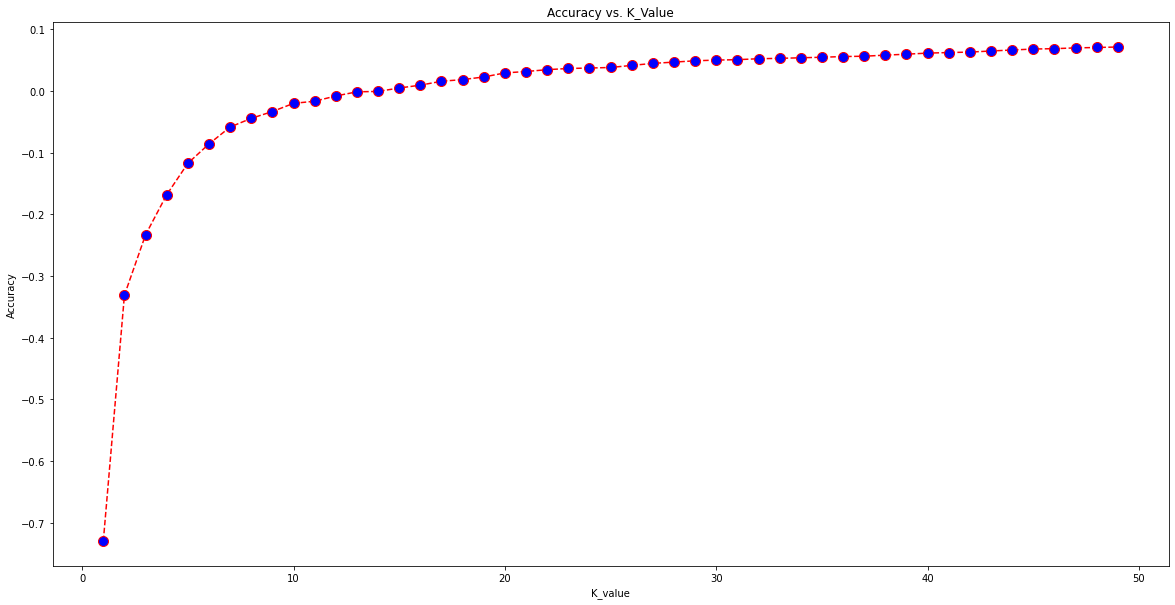

In [183]:
plt.figure(figsize=(20,10))
plt.plot(range(1,50),accuracy,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs. K_Value')
plt.xlabel('K_value')
plt.ylabel('Accuracy')

In [240]:
#Now we can apply KNN with k=17 to check performance

tuned_reg_model= KNeighborsRegressor(n_neighbors=38)

In [241]:
tuned_reg_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=38)

In [242]:
# performance of model on train dataset
tuned_reg_model.score(X_train,y_train)

0.5912851537419983

In [243]:
# performance of model on test dataset
tuned_reg_model.score(X_test,y_test)

0.7161478273082795

In [244]:
tuned_reg_model.score(X_,y_)

0.4651272759849935

In [245]:
# prediction 

y_pred=tuned_reg_model.predict(X_)

In [246]:
comp=pd.DataFrame({'Actual':y_,'Predicted':y_pred})

<AxesSubplot:>

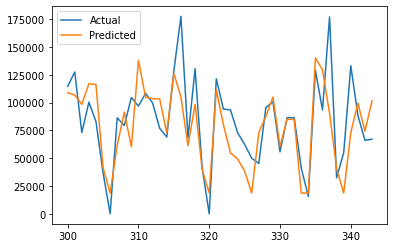

In [247]:
comp.plot()

In [248]:
comp['Error']=comp['Actual']-comp['Predicted']

In [249]:
comp

,Actual,Predicted,Error
300,114534.21,108771.099474,5763.110526
301,127412.10,106781.410526,20630.689474
302,73107.94,98402.032895,-25294.092895
303,100335.70,116961.335789,-16625.635789
304,82920.44,116062.603421,-33142.163421
305,36992.00,41598.291842,-4606.291842
306,326.00,18836.625263,-18510.625263
307,86287.17,61624.418947,24662.751053
308,79380.38,91414.025526,-12033.645526
309,104509.01,60205.880000,44303.130000


In [147]:
X_

,Completed Jobs,TMAX,Avg Sales,tech_count,f1,f2,f3
300,111,63,1597.616912,39,1.868345e+06,4.290656,14.784169
301,131,72,1218.771111,61,1.827381e+06,3.635273,15.267597
302,108,74,1418.769895,50,1.592383e+06,3.321237,15.253261
303,118,64,1600.403596,70,2.051410e+06,2.496180,14.861992
304,116,65,1678.413214,37,2.096939e+06,4.687567,14.899957
305,53,72,1225.002424,17,4.726621e+05,3.157004,14.815144
306,1,84,326.000000,8,3.260000e+02,1.828427,13.292450
307,106,84,821.319479,51,8.963362e+05,3.154202,15.624170
308,102,75,1401.394130,49,1.443645e+06,3.099505,15.264951
309,50,70,2364.647059,23,8.360290e+05,2.275236,14.701497


In [250]:
from sklearn import metrics

np.sqrt(metrics.mean_squared_error(y_,y_pred))

28274.033660303805